In [42]:
import pandas as pd

In [43]:
drivers = pd.read_csv("../Scraping_for_clustering/f1db_csv/drivers.csv")
lap_times = pd.read_csv("../Scraping_for_clustering/f1db_csv/lap_times.csv")
races = pd.read_csv("../Scraping_for_clustering/f1db_csv/races.csv")

In [44]:
merge1 = pd.merge(lap_times, races, on='raceId')
merge_df = pd.merge(merge1, drivers, on='driverId')

In [45]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550927 entries, 0 to 550926
Data columns (total 31 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   raceId        550927 non-null  int64 
 1   driverId      550927 non-null  int64 
 2   lap           550927 non-null  int64 
 3   position      550927 non-null  int64 
 4   time_x        550927 non-null  object
 5   milliseconds  550927 non-null  int64 
 6   year          550927 non-null  int64 
 7   round         550927 non-null  int64 
 8   circuitId     550927 non-null  int64 
 9   name          550927 non-null  object
 10  date          550927 non-null  object
 11  time_y        550927 non-null  object
 12  url_x         550927 non-null  object
 13  fp1_date      550927 non-null  object
 14  fp1_time      550927 non-null  object
 15  fp2_date      550927 non-null  object
 16  fp2_time      550927 non-null  object
 17  fp3_date      550927 non-null  object
 18  fp3_time      550927 non

In [46]:
merge_df.drop(['time_y','code','driverRef','dob','nationality','time_y','url_x','url_y','fp1_date','fp2_date','fp3_date','fp1_time','fp2_time','fp3_time','quali_date','quali_time','sprint_date','sprint_time','driverRef'], axis=1, inplace=True)

In [47]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550927 entries, 0 to 550926
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   raceId        550927 non-null  int64 
 1   driverId      550927 non-null  int64 
 2   lap           550927 non-null  int64 
 3   position      550927 non-null  int64 
 4   time_x        550927 non-null  object
 5   milliseconds  550927 non-null  int64 
 6   year          550927 non-null  int64 
 7   round         550927 non-null  int64 
 8   circuitId     550927 non-null  int64 
 9   name          550927 non-null  object
 10  date          550927 non-null  object
 11  number        550927 non-null  object
 12  forename      550927 non-null  object
 13  surname       550927 non-null  object
dtypes: int64(8), object(6)
memory usage: 58.8+ MB


In [48]:
merge_df.rename(columns={'milliseconds':'lap_total_time', 'time_x':'time'}, inplace=True)
merge_df['driver_name'] = merge_df['forename'] + ' ' + merge_df['surname']
merge_df.drop(['forename','surname'], axis=1, inplace=True)

In [49]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550927 entries, 0 to 550926
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   raceId          550927 non-null  int64 
 1   driverId        550927 non-null  int64 
 2   lap             550927 non-null  int64 
 3   position        550927 non-null  int64 
 4   time            550927 non-null  object
 5   lap_total_time  550927 non-null  int64 
 6   year            550927 non-null  int64 
 7   round           550927 non-null  int64 
 8   circuitId       550927 non-null  int64 
 9   name            550927 non-null  object
 10  date            550927 non-null  object
 11  number          550927 non-null  object
 12  driver_name     550927 non-null  object
dtypes: int64(8), object(5)
memory usage: 54.6+ MB


# Data Cleaning


In [50]:
merge_df = merge_df[merge_df['date'] > '2018-01-01']
merge_df

,raceId,driverId,lap,position,time,lap_total_time,year,round,circuitId,name,date,number,driver_name
10723,989,20,58,1,1:28.863,88863,2018,1,1,Australian Grand Prix,2018-03-25,5,Sebastian Vettel
10724,989,20,57,1,1:26.990,86990,2018,1,1,Australian Grand Prix,2018-03-25,5,Sebastian Vettel
10725,989,20,56,1,1:27.236,87236,2018,1,1,Australian Grand Prix,2018-03-25,5,Sebastian Vettel
10726,989,20,55,1,1:26.983,86983,2018,1,1,Australian Grand Prix,2018-03-25,5,Sebastian Vettel
10727,989,20,54,1,1:26.711,86711,2018,1,1,Australian Grand Prix,2018-03-25,5,Sebastian Vettel
...,...,...,...,...,...,...,...,...,...,...,...,...,...
550922,1109,857,66,5,1:23.787,83787,2023,11,11,Hungarian Grand Prix,2023-07-23,81,Oscar Piastri
550923,1109,857,67,5,1:24.053,84053,2023,11,11,Hungarian Grand Prix,2023-07-23,81,Oscar Piastri
550924,1109,857,68,5,1:25.152,85152,2023,11,11,Hungarian Grand Prix,2023-07-23,81,Oscar Piastri
550925,1109,857,69,5,1:24.439,84439,2023,11,11,Hungarian Grand Prix,2023-07-23,81,Oscar Piastri


In [51]:
merge_df.to_csv("formula_1.csv", index=False)

# Data Analysis

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

In [53]:
f1_df = pd.read_csv("formula_1.csv")

In [54]:
f1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124294 entries, 0 to 124293
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   raceId          124294 non-null  int64 
 1   driverId        124294 non-null  int64 
 2   lap             124294 non-null  int64 
 3   position        124294 non-null  int64 
 4   time            124294 non-null  object
 5   lap_total_time  124294 non-null  int64 
 6   year            124294 non-null  int64 
 7   round           124294 non-null  int64 
 8   circuitId       124294 non-null  int64 
 9   name            124294 non-null  object
 10  date            124294 non-null  object
 11  number          124294 non-null  int64 
 12  driver_name     124294 non-null  object
dtypes: int64(9), object(4)
memory usage: 12.3+ MB


In [55]:
f1_df.keys()

Index(['raceId', 'driverId', 'lap', 'position', 'time', 'lap_total_time',
       'year', 'round', 'circuitId', 'name', 'date', 'number', 'driver_name'],
      dtype='object')

In [56]:
q1 = f1_df.lap_total_time.quantile(0.25)
q3 = f1_df.lap_total_time.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
print(f'Lower bound: {lower_bound}')
print(f'Upper bound: {upper_bound}')

Lower bound: 50202.375
Upper bound: 130833.375


In [57]:
f1_df = f1_df[(f1_df.lap_total_time > lower_bound) & (f1_df.lap_total_time < upper_bound)]

<Axes: >

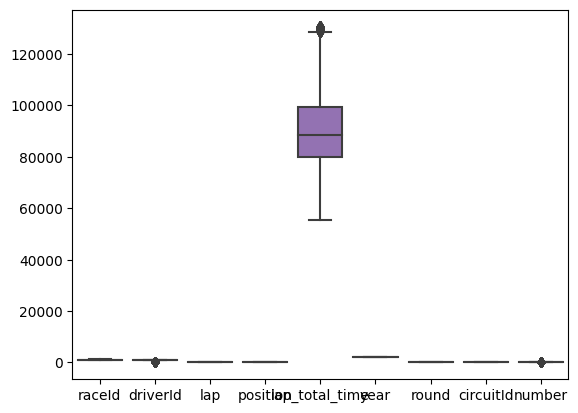

In [58]:
sns.boxplot(data=f1_df)

In [59]:
f1_df.head()

,raceId,driverId,lap,position,time,lap_total_time,year,round,circuitId,name,date,number,driver_name
0,989,20,58,1,1:28.863,88863,2018,1,1,Australian Grand Prix,2018-03-25,5,Sebastian Vettel
1,989,20,57,1,1:26.990,86990,2018,1,1,Australian Grand Prix,2018-03-25,5,Sebastian Vettel
2,989,20,56,1,1:27.236,87236,2018,1,1,Australian Grand Prix,2018-03-25,5,Sebastian Vettel
3,989,20,55,1,1:26.983,86983,2018,1,1,Australian Grand Prix,2018-03-25,5,Sebastian Vettel
4,989,20,54,1,1:26.711,86711,2018,1,1,Australian Grand Prix,2018-03-25,5,Sebastian Vettel


In [60]:
def generate_shorthand(name):
    parts = name.split(' ')
    if len(parts) > 1:
        return parts[0][0] + parts[1][0]
    else:
        return parts[0][0]
colors = [
    'b', 'g', 'r', 'c', 'm', 'y', 'k', 
    '#FF6347', '#8A2BE2', '#D2691E', '#7FFF00', '#20B2AA', '#FF4500', '#2E8B57', 
    '#ADFF2F', '#FFD700', '#4B0082', '#7CFC00', '#BA55D3', '#9370DB', '#3CB371', 
    '#7B68EE', '#00FA9A', '#48D1CC', '#C71585', '#191970', '#6B8E23', '#FFA07A', 
    '#B0C4DE', '#66CDAA', '#0000CD', '#40E0D0', '#FFC0CB', '#FA8072', '#F08080'
]


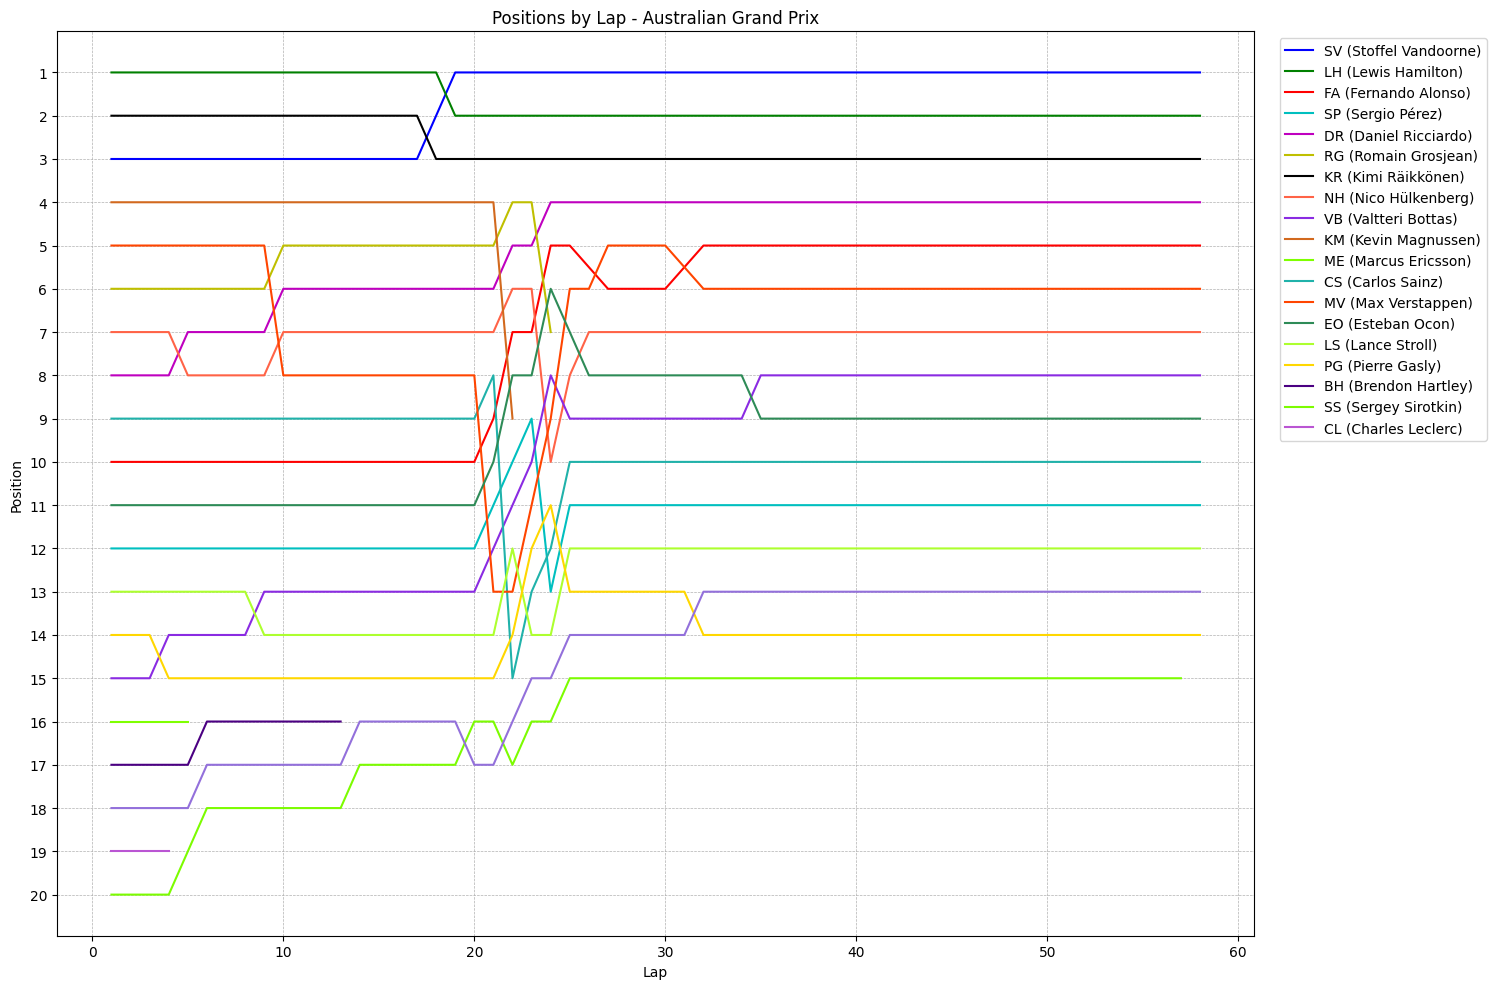

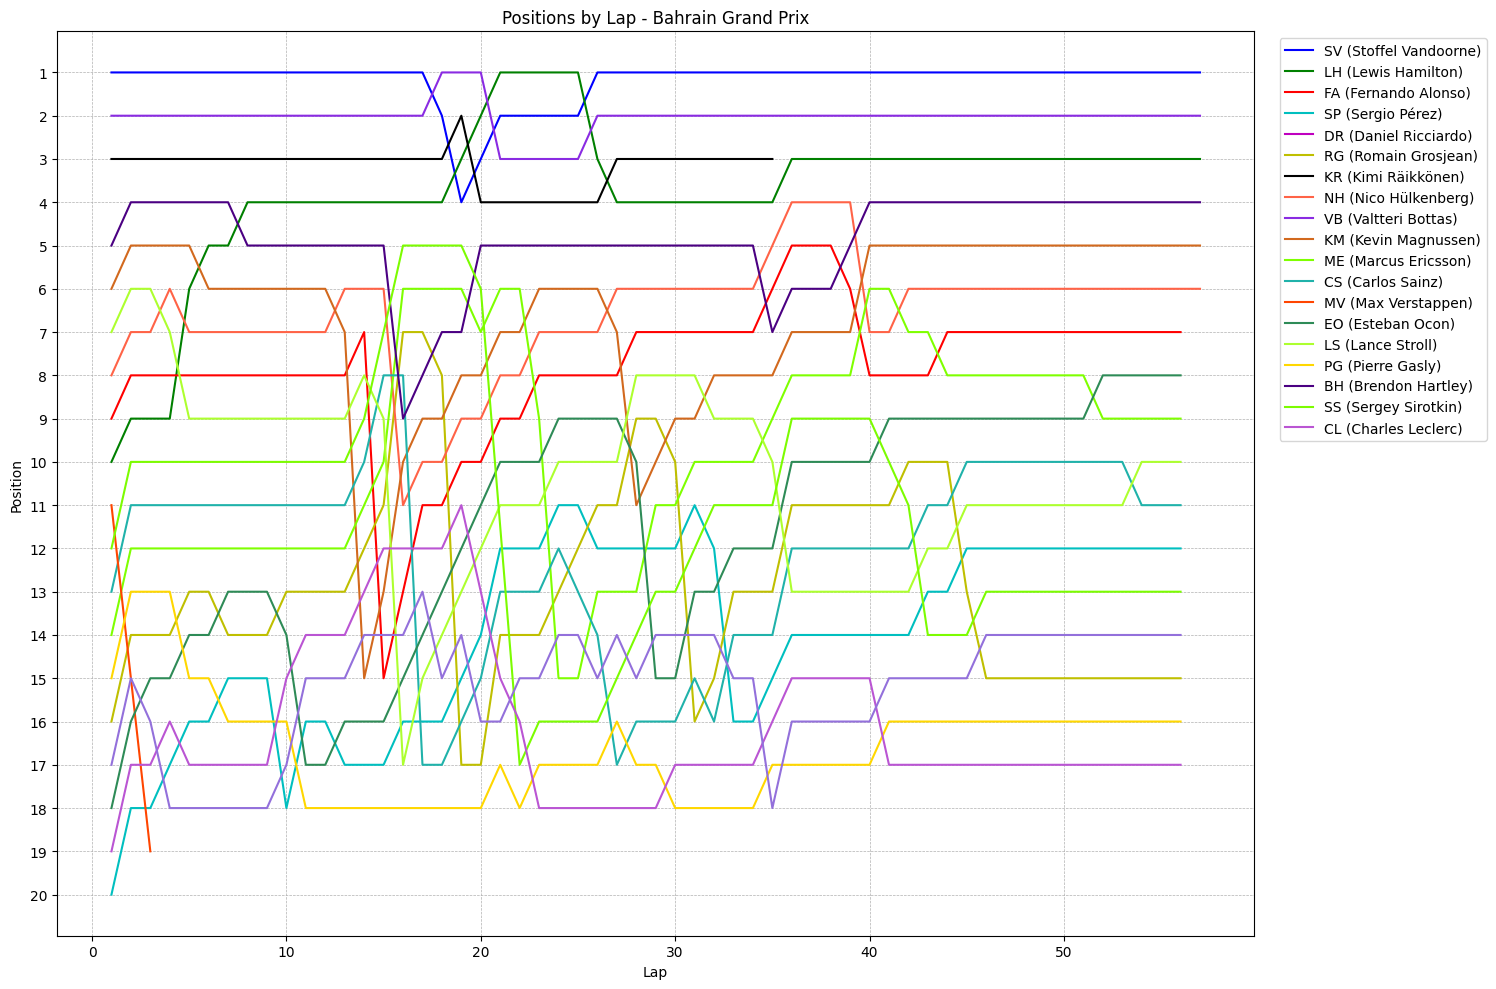

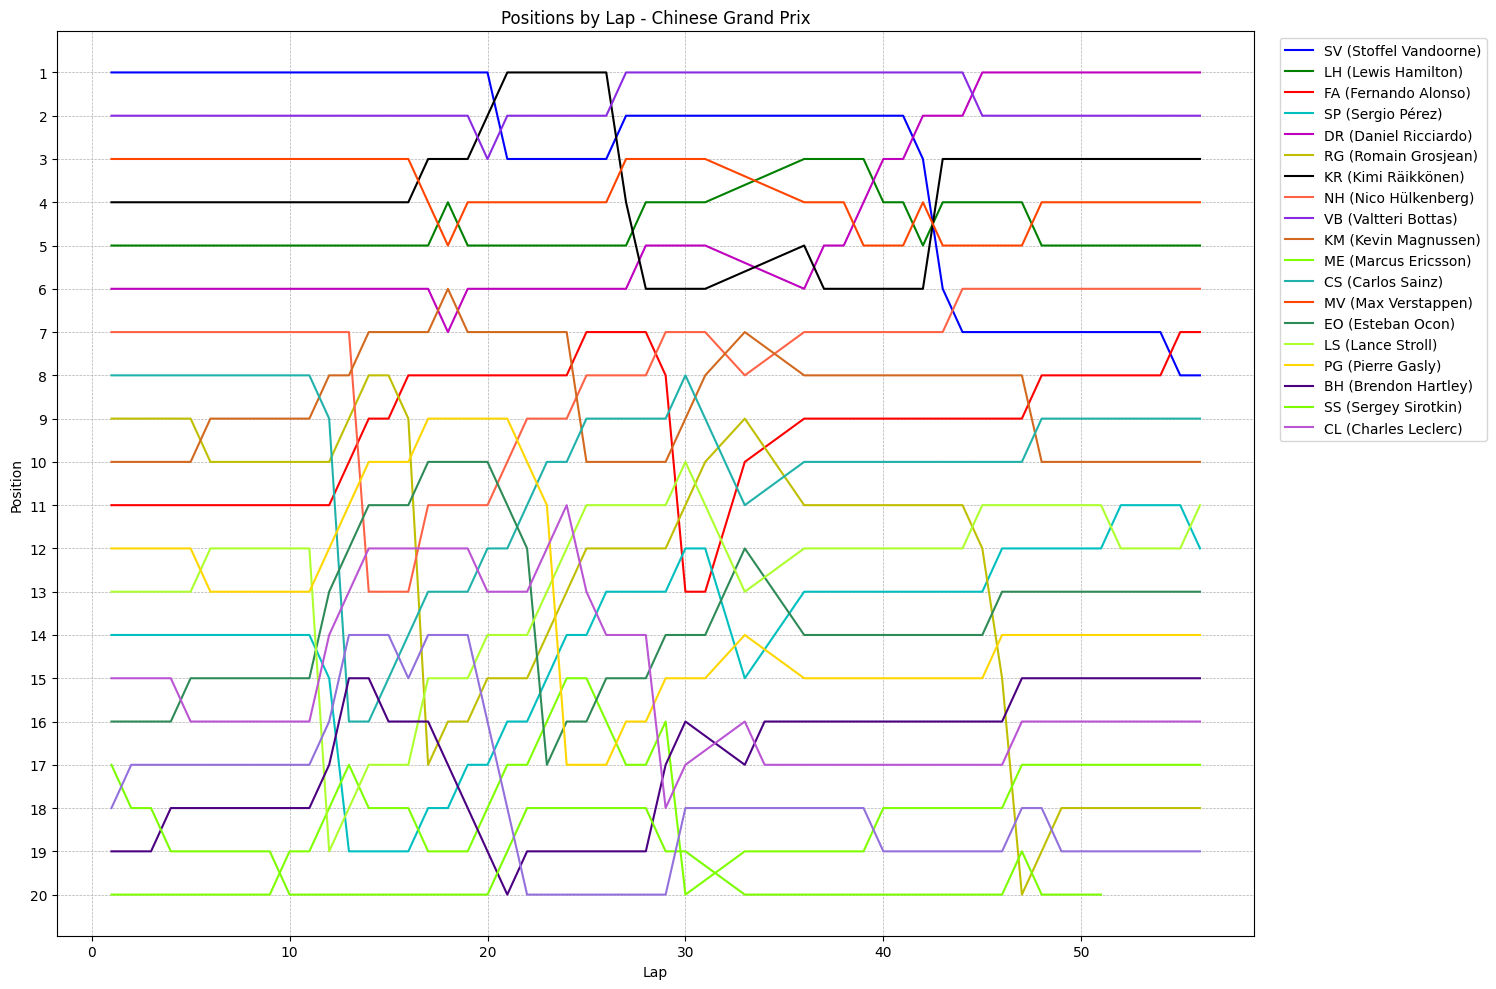

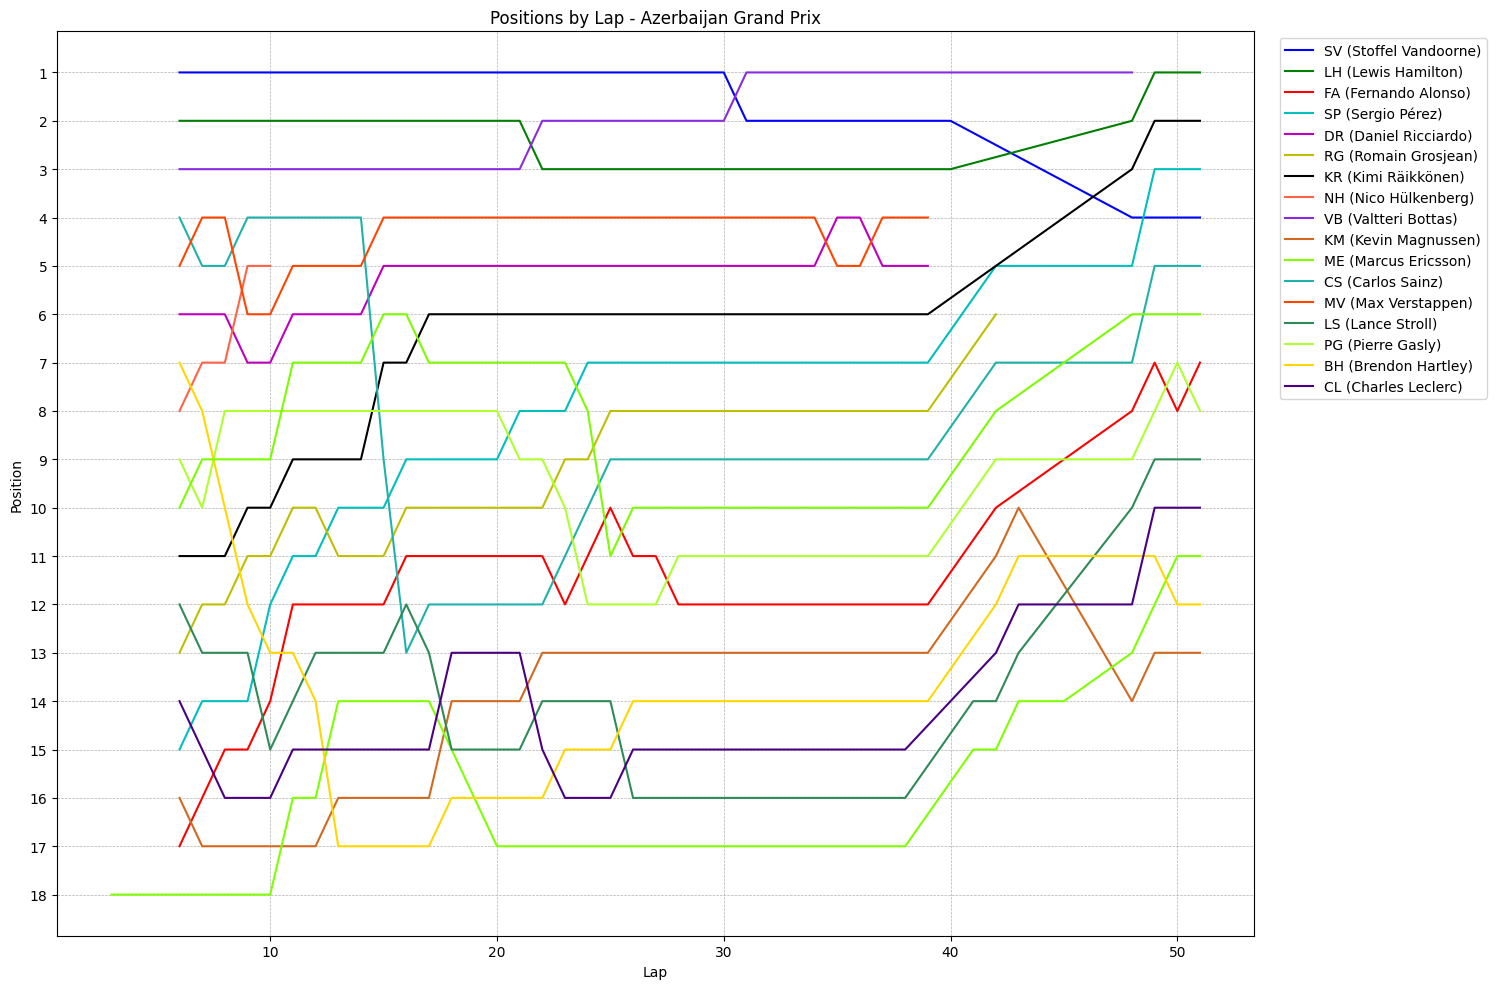

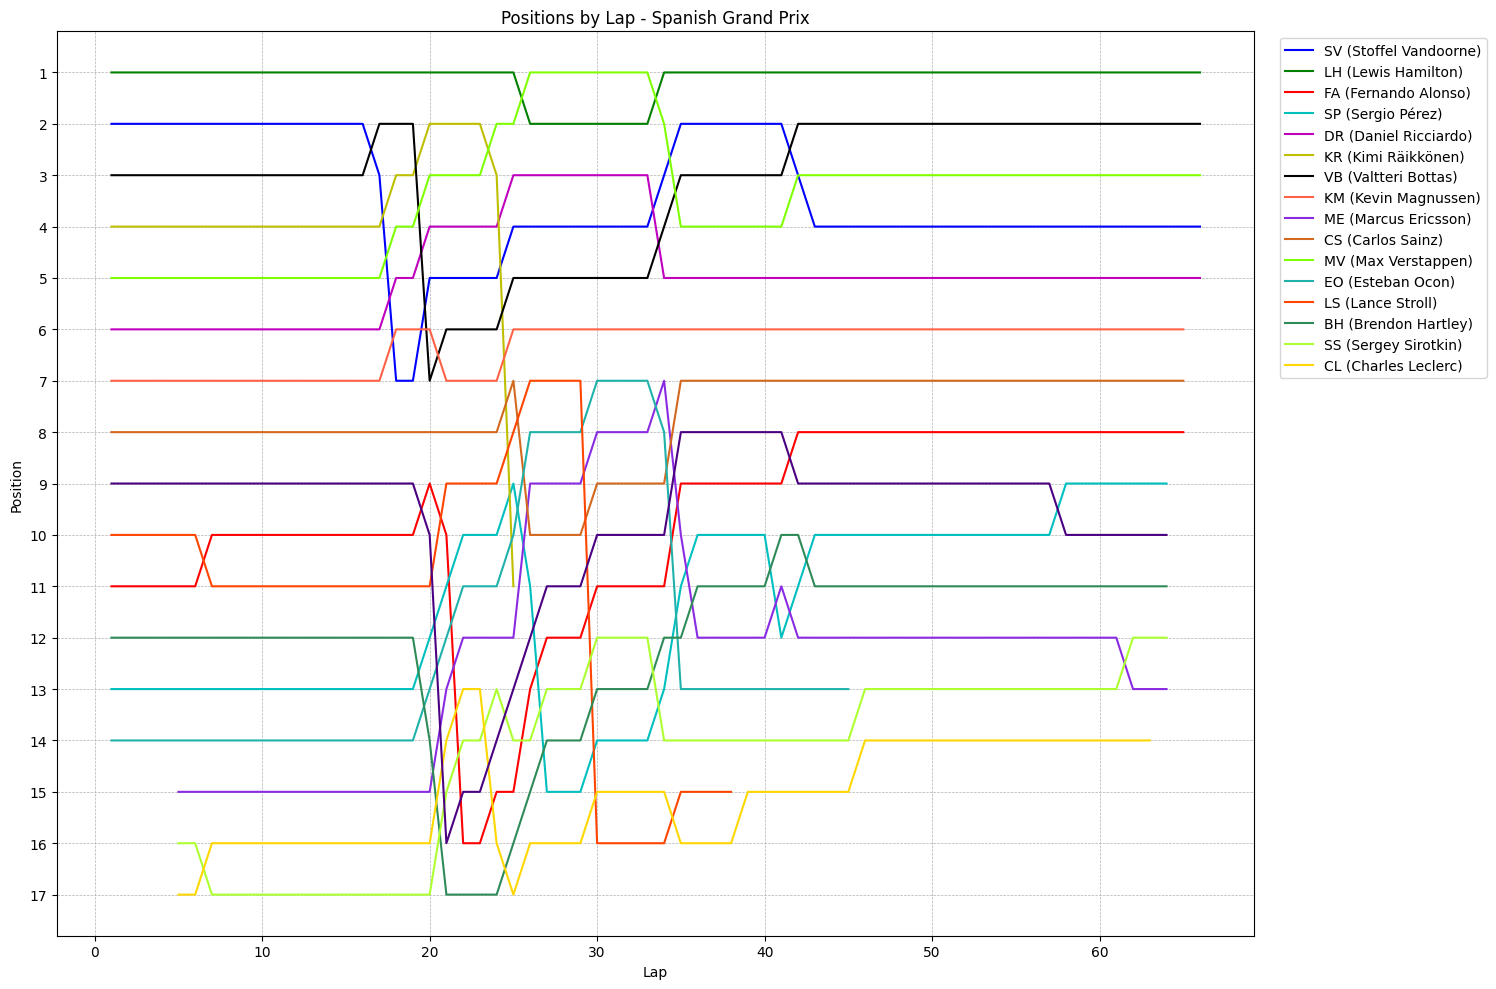

In [63]:
import matplotlib.pyplot as plt

# Select 5 unique raceIds from the data
selected_race_ids = f1_df['raceId'].unique()[:5]

# Create a plot for each selected raceId with the modifications from earlier
for race_id in selected_race_ids:
    race_data = f1_df[f1_df['raceId'] == race_id]
    race_name = race_data['name'].iloc[0]
    
    plt.figure(figsize=(15, 10))
    
    shorthands = {}  # Dictionary to store shorthands for legend
    color_index = 0  # Index to keep track of colors
    
    # For each driver in the specific race, plot their position across the laps
    for driver in race_data['driver_name'].unique():
        driver_data = race_data[race_data['driver_name'] == driver]
        shorthand = generate_shorthand(driver)
        shorthands[shorthand] = driver
        plt.plot(driver_data['lap'], driver_data['position'], label=shorthand, color=colors[color_index % len(colors)])
        color_index += 1
    
    # Configure the plot
    plt.gca().invert_yaxis()  # Invert the y-axis so that position 1 is at the top
    plt.yticks(range(1, int(race_data['position'].max()) + 1))  # Set y-axis ticks to whole numbers
    plt.title(f'Positions by Lap - {race_name}')
    plt.xlabel('Lap')
    plt.ylabel('Position')
    plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1), labels=[f"{key} ({shorthands[key]})" for key in shorthands])
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    
    # Display the plot
    plt.show()


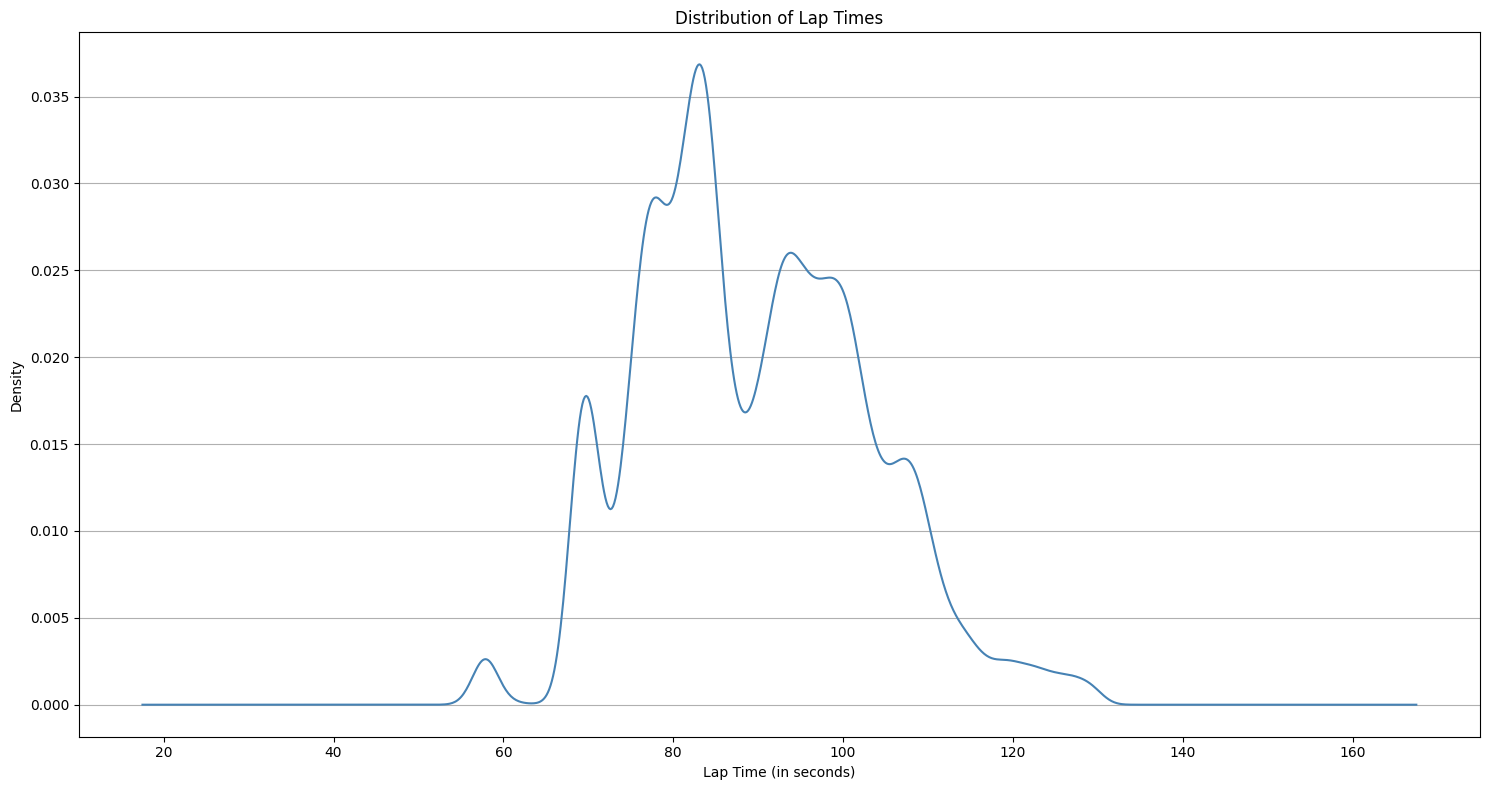

In [68]:
# Re-create the 'time_dt' column to represent lap times in datetime format
f1_df['time_dt'] = pd.to_datetime(f1_df['time'], errors='coerce', format='%M:%S.%f')

# Convert time data to seconds for easier plotting
f1_df['time_in_seconds'] = f1_df['time_dt'].dt.second + f1_df['time_dt'].dt.minute * 60

# Using Matplotlib to generate the KDE plot for lap times distribution
plt.figure(figsize=(15, 8))
f1_df['time_in_seconds'].plot(kind='kde', color='steelblue')
plt.xlabel('Lap Time (in seconds)')
plt.ylabel('Density')
plt.title('Distribution of Lap Times')
plt.grid(axis='y')

plt.tight_layout()
plt.show()


C:\Users\lenovo\AppData\Local\Temp\ipykernel_41660\460852738.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_data_australian_1010['total_seconds'] = race_data_australian_1010['time_dt'].dt.second + race_data_australian_1010['time_dt'].dt.minute * 60


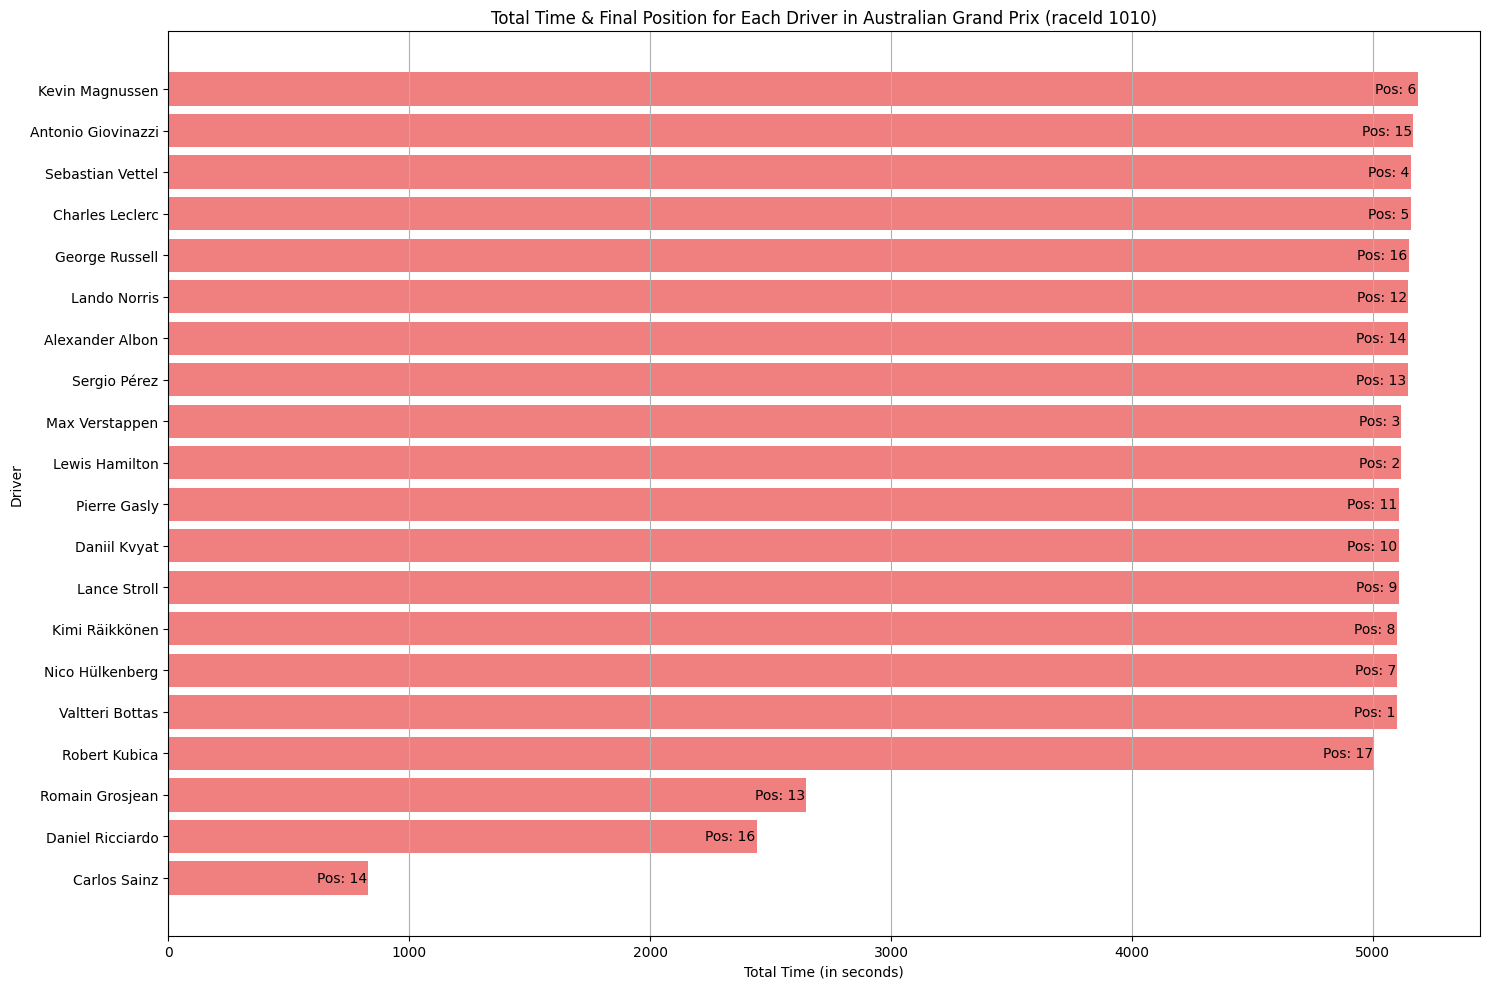

In [70]:
# Implementing the full code again for visualizing the total time and final positions for drivers in the "Australian Grand Prix" with raceId = 1010

# 1. Filter data for the "Australian Grand Prix" with raceId = 1010
race_data_australian_1010 = f1_df[f1_df['raceId'] == 1010]

# 2. Calculate the total time for each driver in this specific race occurrence
race_data_australian_1010['total_seconds'] = race_data_australian_1010['time_dt'].dt.second + race_data_australian_1010['time_dt'].dt.minute * 60
total_times_australian_1010 = race_data_australian_1010.groupby('driver_name')['total_seconds'].sum()

# 3. Calculate the final position for each driver in the race (last lap's position)
final_positions_australian_1010 = race_data_australian_1010.groupby('driver_name').apply(lambda x: x[x['lap'] == x['lap'].max()]['position'].iloc[0])

# 4. Provide a name to the final_positions Series
final_positions_australian_1010.name = 'final_position'

# 5. Merge the total times and final positions dataframes
combined_data = pd.merge(total_times_australian_1010, final_positions_australian_1010, left_index=True, right_index=True)
combined_data = combined_data.sort_values(by='total_seconds')

# 6. Plotting
plt.figure(figsize=(15, 10))
bars = plt.barh(combined_data.index, combined_data['total_seconds'], color='lightcoral')

# Annotate bars with the final position
for bar, position in zip(bars, combined_data['final_position']):
    plt.text(bar.get_width() - 5, bar.get_y() + bar.get_height()/2, f'Pos: {int(position)}', 
             va='center', ha='right', color='black')

plt.xlabel('Total Time (in seconds)')
plt.ylabel('Driver')
plt.title('Total Time & Final Position for Each Driver in Australian Grand Prix (raceId 1010)')
plt.grid(axis='x')

plt.tight_layout()
plt.show()
